<a href="https://colab.research.google.com/github/EduGod0y/Computational-Methods/blob/main/Problema_de_dois_corpos_sob_atra%C3%A7%C3%A3o_gravitacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

o m com menor tempo é 5, demorando 0.0021409988403320312 segundos para rodar o programa, e o erro de 1.5500478700663597e-06


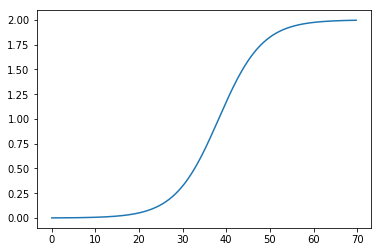

In [ ]:
import time
from math import *
import matplotlib.pyplot as plt

#definindo variaveis
tolerance = 1e-4
dt0 = 1e-5
x0 = 0.001
a = 0.1 
tf = 70
ms=[1,2,3,5,10,20,40,50,70,90]

#definindo funcoes
def rk2(dt, x):
    k1 = a*x*(2 - x)
    x_aux = x + (1./2.)*k1*dt
    k2 = a*x_aux*(2 - x_aux)
    x = x + k2*dt
        
    return x


def rk4(dt, x):
    k1 = a*x*(2 - x)
    k2 = a*x*(2 - (x + (1./2.)*k1*dt))
    k3 = a*x*(2 - (x + (1./2.)*k2*dt))
    k4 = a*x*(2 - (x + k3*dt))
    x = x + (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)*dt
        
    return x



#algoritmo
tempos = []
ml= []

for i in range(len(ms)):
    start_time = 0.
    m=ms[i]
    n = 0
    t = 0.
    start_time = time.time()
    xlist = []
    tlist = []

    x = x0
    dt = dt0

    while (t<=tf):
        xa = x
        n = n+1
        x_rk2 = rk2(dt, x)  
        x = rk4(dt, x)
        if n%m == 0:
            
            current_error = sqrt(abs( ((x - xa)**2) - ((x_rk2 - xa)**2) ))
            dt_new = dt * ((tolerance/current_error)**(1/3))

            if dt_new > 2*dt:
                dt_new = 2*dt
                dt = dt_new

            else:
                dt = dt_new


        
        #print(x)
        tlist.append(t)
        xlist.append(x)
        t = t+dt

    tempo = time.time() - start_time
    tempos.append(tempo)
    ml.append(m)


#print(plot_x)
#fazer um sort na lista depois e encontrar o elemento que tem menor tempo de execucao
shortest = [i[0] for i in sorted(enumerate(tempos), key=lambda x:x[1])][0]
shortest_m = ml[shortest]
print(f"o m com menor tempo é {shortest_m}, demorando {tempos[shortest]} segundos para rodar o programa, e o erro de {current_error}")

plt.plot(tlist, xlist)